In [ ]:
cd drive/MyDrive/Colab\ Notebooks/bert_classifier

/content/drive/MyDrive/Colab Notebooks/bert_classifier


In [ ]:
!pip install -qq transformers datasets wordcloud accelerate

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 527.3/527.3 kB 39.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39.9/39.9 MB 52.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requi

In [ ]:
# !pip install pyarrow

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import string
import torch
from transformers import BertTokenizer
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
## –≠—Ç–æ—Ç —Å—Ç—Ä–∞—à–Ω—ã–π –∫–æ–¥ –Ω—É–∂–µ–Ω, —á—Ç–æ–±—ã —Å–≥—Ä—É–∑–∏—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –ø—Ä—è–º–æ –Ω–∞–ø—Ä—è–º—É—é —Å –ö–∞–≥–≥–ª–∞.

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'womens-ecommerce-clothing-reviews:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F11827%2F16290%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240824%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240824T180513Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D04c108a21366ac6b5d78811e97c0da121bf9d23ee834c7f3483df5db35be9787d2c27461461e20bdb2cc466c23517ea01bef880e214ff65a3cf21d62ac49a3febc6b2eb61b3566efb4c1abb650cb3c4a95b8be16f5ecd741e127088c7d9b77bc949c2290bf0c190a2d05a7b1acd56a73d198a154fa2008327acb67cd50e346c8b50a83d52be23e4873b205642ee1c393b3fb101387b950b1f9c1ff4f7e030e5fa3b7054ca1088c30ca1a7b83d970ebcfe037628dbf3e74f2c76ef52237f0ef6464969919b548c9170215d2e708742af8d099bd46355d3561f31d7f4109180394658a3a3cba00c657734d83be1c5b9eb9e5aa9d3398a583556f55a070bedc5530'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2924120 bytes downloaded
Downloaded and uncompressed: womens-ecommerce-clothing-reviews
Data source import complete.


In [ ]:
review = pd.read_csv(r'/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
review = review.dropna()

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [ ]:
review

Unnamed: 0  Clothing ID  Age  \
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
5               5         1080   49   
6               6          858   39   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
5                                Not for the very petite   
6                                   Cagrcoal shimmer fun   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
5      I love tracy reese dresses, but this one is no...       2   
6      I aded this in my basket at hte last mintue to...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
5                    0                        4         General   
6                    1                        1  General Petite   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
5             Dresses    Dresses  
6                Tops      Knits  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[19662 rows x 11 columns]

In [ ]:
topest = review['Class Name'].value_counts() # From topest to analyze
topest

Class Name
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

## Word Cloud

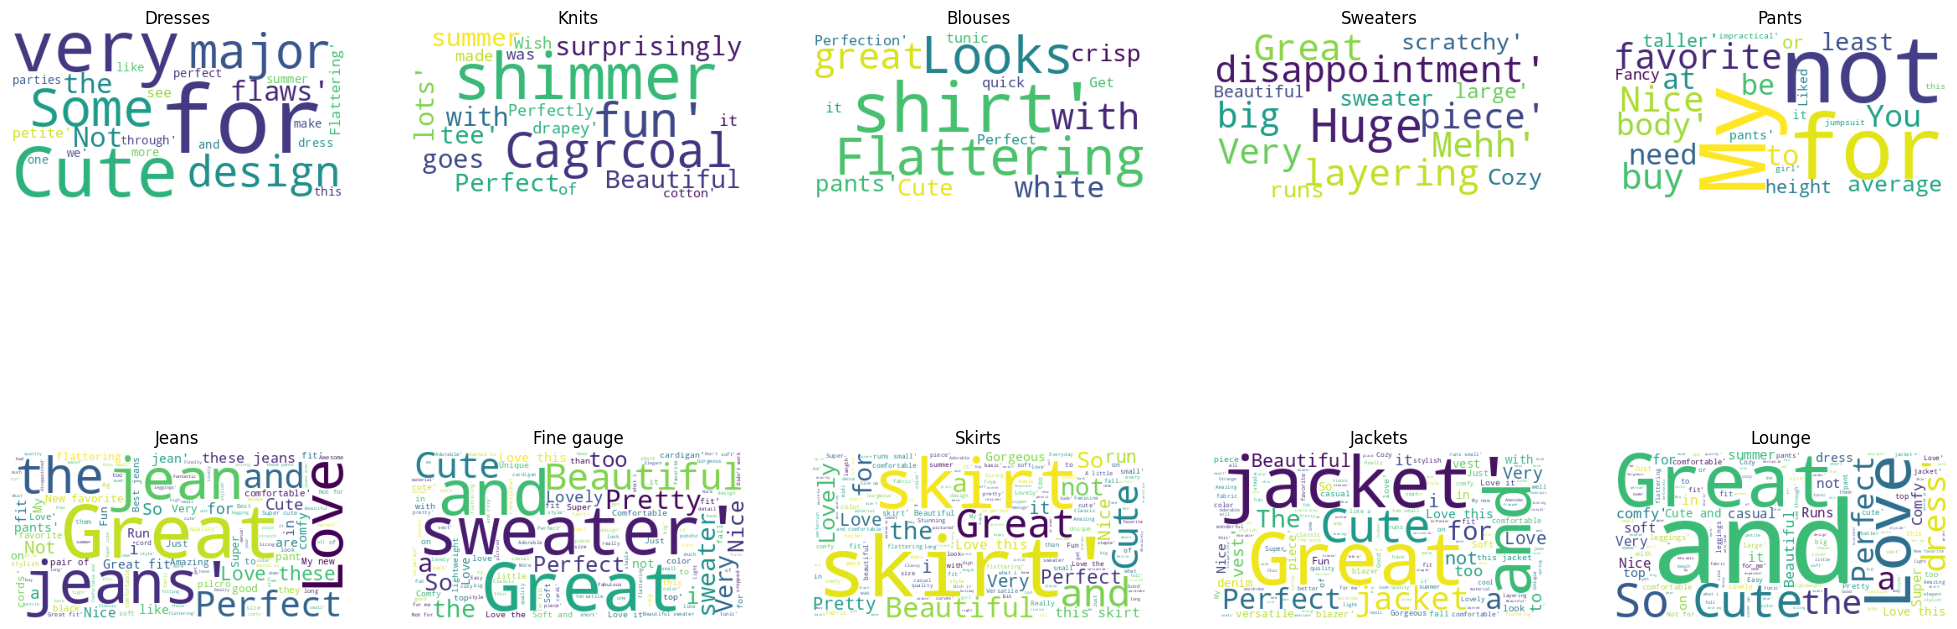

In [ ]:
fig, axs = plt.subplots(2, 5, figsize = (25, 10))
for i, ax in zip(topest.keys()[:10], axs.ravel()):
    wc = WordCloud(background_color = 'white', stopwords = ['through', 'we', 'Please', 'but']).generate(str(review[review['Class Name'] == i]['Title'].values))
    ax.set_title(i)
    ax.axis("off")
    ax.imshow(wc)

## –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∏ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [ ]:
review['Recommended IND'].value_counts()

Recommended IND
1    16087
0     3575
Name: count, dtype: int64

In [ ]:
dress_review = review[review['Class Name'] == 'Dresses']
dress_index = dress_review['Clothing ID'].value_counts()

In [ ]:
dress_review.head()

Unnamed: 0  Clothing ID  Age  \
2            2         1077   60   
5            5         1080   49   
8            8         1077   24   
9            9         1077   34   
10          10         1077   53   

                                           Title  \
2                        Some major design flaws   
5                        Not for the very petite   
8                                     Flattering   
9                              Such a fun dress!   
10  Dress looks like it's made of cheap material   

                                          Review Text  Rating  \
2   I had such high hopes for this dress and reall...       3   
5   I love tracy reese dresses, but this one is no...       2   
8   I love this dress. i usually get an xs but it ...       5   
9   I'm 5"5' and 125 lbs. i ordered the s petite t...       5   
10  Dress runs small esp where the zipper area run...       3   

    Recommended IND  Positive Feedback Count Division Name Department Name  \
2                 0                        0       General         Dresses   
5                 0                        4       General         Dresses   
8                 1                        0       General         Dresses   
9                 1                        0       General         Dresses   
10                0                       14       General         Dresses   

   Class Name  
2     Dresses  
5     Dresses  
8     Dresses  
9     Dresses  
10    Dresses

In [ ]:
recommend_text = dress_review[['Review Text', 'Recommended IND']]
recommend_text.rename(columns={'Review Text': 'text',
                   'Recommended IND': 'label'},
          inplace=True, errors='raise')
recommend_text

<ipython-input-10-d614eeecf02f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend_text.rename(columns={'Review Text': 'text',


text  label
2      I had such high hopes for this dress and reall...      0
5      I love tracy reese dresses, but this one is no...      0
8      I love this dress. i usually get an xs but it ...      1
9      I'm 5"5' and 125 lbs. i ordered the s petite t...      1
10     Dress runs small esp where the zipper area run...      0
...                                                  ...    ...
23478  I was surprised at the positive reviews for th...      0
23481  I was very happy to snag this dress at such a ...      1
23483  This fit well, but the top was very see throug...      0
23484  I bought this dress for a wedding i have this ...      1
23485  This dress in a lovely platinum is feminine an...      1

[5371 rows x 2 columns]

–ù–∞ –º–æ–π –≤–∑–≥–ª—è–¥, —Ç–µ–∫—Å—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —á–∏—Å—Ç—ã–π. –Ø —á–∏—Ç–∞–ª, —á—Ç–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –±–∞–∑–µ –∞—Ä—Ö–µ—Ç–µ–∫—Ç—É—Ä—ã —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä —è–≤–ª—è–µ—Ç—Å—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∏–∑–±—ã—Ç–æ—á–Ω—ã–º –¥–µ–ª–æ–º, –µ—Å–ª–∏ —Ç–µ–∫—Å—Ç –Ω–µ –æ—á–µ–Ω—å –≥—Ä—è–∑–Ω—ã–π.

–Ø –ø–æ–∫–∞–∂—É, —á—Ç–æ —É–º–µ—é –¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ –∑–∞–¥–∞–Ω–∏—è, –Ω–æ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ç–µ–∫—Å—Ç. –¢–æ–ª—å–∫–æ –µ—Å–ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –º–µ–Ω—è –±—É–¥–µ—Ç –Ω–µ —É—Å—Ç—Ä–∞–∏–≤–∞—Ç—å—Å—è, –≤–µ—Ä–Ω—É—Å—å –∫ —ç—Ç–æ–º—É –≤–æ–ø—Ä–æ—Å—É.

In [ ]:
recommend_text.text.describe()

count                                                  5371
unique                                                 5370
top       I purchased this and another eva franco dress ...
freq                                                      2
Name: text, dtype: object

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞

In [ ]:
def preprocess_text(text):
    # –£–¥–∞–ª–µ–Ω–∏–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤ –∏ —Ü–∏—Ñ—Ä
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # –£–¥–∞–ª–µ–Ω–∏–µ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–µ–ª–æ–≤
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è

recommend_text['clean_text'] = recommend_text['text'].apply(preprocess_text)

<ipython-input-11-212c2fccbc3a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend_text['clean_text'] = recommend_text['text'].apply(preprocess_text)


–≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Å–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:

–£–¥–∞–ª—è–µ—Ç –≤—Å–µ —Å–∏–º–≤–æ–ª—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –±—É–∫–≤–∞–º–∏ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –∞–ª—Ñ–∞–≤–∏—Ç–∞ –∏–ª–∏ –ø—Ä–æ–±–µ–ª–∞–º–∏. –≠—Ç–æ –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è —É–¥–∞–ª–µ–Ω–∏–µ —Ü–∏—Ñ—Ä, –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è –∏ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤.
–ó–∞–º–µ–Ω—è–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–æ–±–µ–ª—ã –Ω–∞ –æ–¥–∏–Ω –ø—Ä–æ–±–µ–ª –∏ —É–¥–∞–ª—è–µ—Ç –ª–∏—à–Ω–∏–µ –ø—Ä–æ–±–µ–ª—ã –≤ –Ω–∞—á–∞–ª–µ –∏ –∫–æ–Ω—Ü–µ —Å—Ç—Ä–æ–∫–∏.

In [ ]:
recommend_text.head()

text  label  \
2   I had such high hopes for this dress and reall...      0   
5   I love tracy reese dresses, but this one is no...      0   
8   I love this dress. i usually get an xs but it ...      1   
9   I'm 5"5' and 125 lbs. i ordered the s petite t...      1   
10  Dress runs small esp where the zipper area run...      0   

                                           clean_text  
2   I had such high hopes for this dress and reall...  
5   I love tracy reese dresses but this one is not...  
8   I love this dress i usually get an xs but it r...  
9   Im and lbs i ordered the s petite to make sure...  
10  Dress runs small esp where the zipper area run...

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased", padding = 'max_length', truncation = True)
dataset = Dataset.from_pandas(recommend_text)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ Data Collator
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


train_test_split = dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
val_dataset = train_test_split['test']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –∫ –¥–∞—Ç–∞—Å–µ—Ç–∞–º
train_dataset = train_dataset.map(tokenize_function, batched = True)
val_dataset = val_dataset.map(tokenize_function, batched = True)

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ñ–æ—Ä–º–∞—Ç –¥–∞–Ω–Ω—ã—Ö
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/4296 [00:00<?, ? examples/s]

Map:   0%|          | 0/1075 [00:00<?, ? examples/s]

In [ ]:
train_dataset

Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4296
})

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'eval_f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ–±—É—á–µ–Ω–∏—è
training_args = TrainingArguments(
    "bert_result",
    evaluation_strategy="epoch",
    save_strategy="epoch",  # –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å –∫–∞–∂–¥—É—é —ç–ø–æ—Ö—É
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    num_train_epochs = 5,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,  # –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –≤ –∫–æ–Ω—Ü–µ –æ–±—É—á–µ–Ω–∏—è
    metric_for_best_model="f1",  # –ú–µ—Ç—Ä–∏–∫–∞ –¥–ª—è –≤—ã–±–æ—Ä–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
    greater_is_better=True,  # True, –µ—Å–ª–∏ –±–æ–ª—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ª—É—á—à–µ
    remove_unused_columns=True,  # –ü–æ–∑–≤–æ–ª—è–µ—Ç –Ω–µ —É–¥–∞–ª—è—Ç—å –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –∏–∑ –æ–±—ä–µ–∫—Ç–∞ Dataset
    push_to_hub=True,
    warmup_steps=500,
    hub_model_id="data-silence/dress-classifier",
    hub_strategy="every_save",
    )

# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
trainer.train()

TrainOutput(global_step=1345, training_loss=0.19392688992298227, metrics={'train_runtime': 498.5014, 'train_samples_per_second': 43.089, 'train_steps_per_second': 2.698, 'total_flos': 5651625469132800.0, 'train_loss': 0.19392688992298227, 'epoch': 5.0})

In [ ]:
# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
trainer.evaluate()

{'eval_f1': 0.9259865995814843,
 'eval_loss': 0.3489808738231659,
 'eval_accuracy': 0.9255813953488372,
 'eval_precision': 0.9264741757708169,
 'eval_recall': 0.9255813953488372,
 'eval_runtime': 7.0155,
 'eval_samples_per_second': 153.233,
 'eval_steps_per_second': 9.693,
 'epoch': 5.0}

In [ ]:
trainer.push_to_hub("data-silence/dress-classifier")

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

events.out.tfevents.1724529614.94544b47976e.2444.4:   0%|          | 0.00/560 [00:00<?, ?B/s]

events.out.tfevents.1724529071.94544b47976e.2444.3:   0%|          | 0.00/7.98k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/data-silence/dress-classifier/commit/11d1f5f0033567b6163dee93e2193d1a1b929a6a', commit_message='data-silence/dress-classifier', commit_description='', oid='11d1f5f0033567b6163dee93e2193d1a1b929a6a', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
inputs = tokenizer(val_dataset['text'], padding=True, truncation=True, return_tensors="pt").to(model.device)


model.eval()


with torch.no_grad():
    outputs = model(**inputs)
    predictions = outputs.logits


predicted_labels = torch.argmax(predictions, dim=1)

In [ ]:
# –ü–µ—Ä–µ–º–µ—â–∞–µ–º —Ç–µ–Ω–∑–æ—Ä –Ω–∞ CPU –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º –µ–≥–æ –≤ –º–∞—Å—Å–∏–≤ NumPy
predicted_labels_cpu = predicted_labels.cpu().numpy()

# –¢–µ–ø–µ—Ä—å –∏—Å–ø–æ–ª—å–∑—É–µ–º –º–∞—Å—Å–∏–≤ NumPy –≤ scikit-learn
confusion_matrix(val_dataset['label'], predicted_labels_cpu)
accuracy_score(val_dataset['label'], predicted_labels_cpu)
print(classification_report(val_dataset['label'], predicted_labels_cpu))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       206
           1       0.96      0.95      0.95       869

    accuracy                           0.93      1075
   macro avg       0.88      0.89      0.88      1075
weighted avg       0.93      0.93      0.93      1075



–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –ø–æ—Å—á–∏—Ç–∞–Ω—ã —Ç—Ä–µ–º—è —Å–ø–æ—Å–æ–±–∞–º–∏:
1. —á–µ—Ä–µ–∑ —Å–æ–∑–¥–∞–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é compute_metrics –∏ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫—É—é –æ—Ü–µ–Ω–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ —á–µ—Ä–µ–∑ –Ω–µ—ë  –Ω–∞ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ —Ç—Ä–µ–π—Ä–µ—Ä–æ–º,
2. —á–µ—Ä–µ–∑ trainer.evaluate() –ø–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—é —ç—Ç–∞–ø–∞ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
3. —á–µ—Ä–µ–∑ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π –ø–æ–¥—Ö–æ–¥, –∫–æ–≥–¥–∞ –æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –∫ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É –∏ –∏—Å—Ç–∏–Ω—ã–µ –∏ –ø—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –∫–ª–∞—Å—Å—ã –ø–µ—Ä–µ–¥–∞—é—Ç—Å—è –≤ –º–µ—Ç–æ–¥—ã scikit-learn

# –ë–æ–Ω—É—Å: –ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º —Ä–µ–π—Ç–∏–Ω–≥

In [ ]:
review.Rating.value_counts()

Rating
5    10858
4     4289
3     2464
2     1360
1      691
Name: count, dtype: int64

–ù—É –¥–∞, –∫–ª–∞—Å—Å—ã –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ. –•–æ—Ç—è –∏ –æ–Ω–∏ –∏ –≤ –ø—Ä–æ—à–ª–æ–π –∑–∞–¥–∞—á–µ –±—ã–ª–∏ —Ç–∞–∫–∏–º–∏. –¢–µ–ø–µ—Ä—å –∑–∞–¥–∞—á–∞ –Ω–µ –±–∏–Ω–∞—Ä–Ω–æ–π, –∞ –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –Ω–æ –ø—Ä–∏ –µ—ë —Ä–µ—à–µ–Ω–∏–∏ —á–µ—Ä–∑–µ Trainer —ç—Ç–æ –æ—Å–æ–±–æ –Ω–∏—á–µ–≥–æ –Ω–µ –º–µ–Ω—è–µ—Ç (–∫—Ä–æ–º–µ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏).

–Ø —Ä–µ—à–∏–ª —Å–Ω–∞—á–∞–ª–∞ –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –±–µ–∑ —É—á–µ—Ç–∞ –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤, –∞ –ø–æ—Ç–æ–º –∞–¥–∞–ø—Ç–∏—Ä–æ–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ —Å –Ω–∏–º, –ª—É—á—à–µ–µ —Ä–µ—à–µ–Ω–∏–µ –≥—Ä—É–∑–∏—Ç—å –Ω–∞ Hagging Face

In [ ]:
# ## –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∏ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
rating_text = review[['Review Text', 'Rating']]
rating_text.rename(columns={'Review Text': 'text',
                   'Rating': 'label'},
          inplace=True, errors='raise')
rating_text

# –ü—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏ –º—ã –∑–∞–¥–∞–ª–∏ 5 –∫–ª–∞—Å—Å–æ–≤ —É –º–æ–¥–µ–ª–∏ - –¢—Ä–µ–π–Ω–µ—Ä –æ–∂–∏–¥–∞–µ—Ç –º–µ—Ç–∫–∏ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [0,4], –∞ –≤ —Ä–µ–∞–ª—å–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –¥–∏–∞–ø–∞–∑–æ–Ω [1,5]. –ë–µ–∑ –≤—ã—á–∏—Ç–∞–Ω–∏—è –µ–¥–∏–Ω–∏—Ü—ã –±—É–¥–µ—Ç –æ—à–∏–±–∫–∞
rating_text['label'] = rating_text['label'] - 1

# ## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)
# ... (–∫–æ–¥ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –ø—Ä–∏–º–µ—Ä–∞, –µ—Å–ª–∏ –Ω—É–∂–µ–Ω)

# ## –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è
dataset = Dataset.from_pandas(rating_text)
train_test_split = dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
val_dataset = train_test_split['test']

<ipython-input-7-0c6764abc689>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_text.rename(columns={'Review Text': 'text',
<ipython-input-7-0c6764abc689>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_text['label'] = rating_text['label'] - 1


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched = True)
val_dataset = val_dataset.map(tokenize_function, batched = True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/15729 [00:00<?, ? examples/s]

Map:   0%|          | 0/3933 [00:00<?, ? examples/s]

In [ ]:
# ## –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –º–æ–¥–µ–ª–∏
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)  # 5 labels for Rating (1-5)

# ## –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤ (–¥–ª—è –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö)
class_weights = compute_class_weight('balanced', classes=np.unique(rating_text['label']), y=rating_text['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(model.device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class_weights

tensor([5.6909, 2.8915, 1.5959, 0.9169, 0.3622])

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'eval_f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
# ## –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ–±—É—á–µ–Ω–∏—è (—Å —É—á–µ—Ç–æ–º –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤)
training_args = TrainingArguments(
    "bert_result_rating",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    num_train_epochs = 5,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    remove_unused_columns=True,
    push_to_hub=True,
    warmup_steps=500,
    hub_model_id="data-silence/rating-classifier",
    hub_strategy="every_save",
)

# ## –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ Trainer (—Å —É—á–µ—Ç–æ–º –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,  # Make sure compute_metrics is defined
    tokenizer=tokenizer,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# ## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
trainer.train()

TrainOutput(global_step=4920, training_loss=0.5578020607552877, metrics={'train_runtime': 1719.2898, 'train_samples_per_second': 45.743, 'train_steps_per_second': 2.862, 'total_flos': 2.069292631408128e+16, 'train_loss': 0.5578020607552877, 'epoch': 5.0})

In [ ]:
# ## –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
trainer.evaluate()

{'eval_f1': 0.6729394584845081,
 'eval_loss': 0.8372889757156372,
 'eval_accuracy': 0.6709890668700738,
 'eval_precision': 0.6774322690741015,
 'eval_recall': 0.6709890668700738,
 'eval_runtime': 25.4224,
 'eval_samples_per_second': 154.706,
 'eval_steps_per_second': 9.676,
 'epoch': 5.0}

–ß—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Trainer –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Hugging Face –¥–ª—è –¥–æ–æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏, –Ω–∞–º –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –ø–µ—Ä–µ–¥–∞—Ç—å –≤–µ—Å–æ–≤—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –≤ Trainer.

–í Trainer –Ω–µ—Ç –ø—Ä—è–º–æ–π –æ–ø—Ü–∏–∏ –¥–ª—è —É–∫–∞–∑–∞–Ω–∏—è –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤, –Ω–æ —ç—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, —Å–¥–µ–ª–∞–≤ –∫–∞—Å—Ç–æ–º–Ω—ã–π Trainer, –≤ –∫–æ—Ç–æ—Ä–æ–º –Ω—É–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å –º–µ—Ç–æ–¥ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –ø–æ—Ç–µ—Ä—å –Ω–∞ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –¥–ª—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è CrossEntropyLoss —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º weight.

–í–µ—Å –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –º–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∫–∞–∫ –æ–±—Ä–∞—Ç–Ω—É—é –ø—Ä–æ–ø–æ—Ä—Ü–∏—é –µ–≥–æ —á–∞—Å—Ç–æ—Ç—ã: class_weight = total_samples / (num_classes * count_per_class). –Ø –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è –≥–æ—Ç–æ–≤—ã–º —Ä–µ—à–µ–Ω–∏–µ–º –∏–∑ sklearn.

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –ø—Ä–∏ –æ—Ü–µ–Ω–∫–µ –º–æ–¥–µ–ª–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –º–µ—Ç—Ä–∏–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –ø–æ–¥–≤–µ—Ä–∂–µ–Ω—ã –≤–ª–∏—è–Ω–∏—é –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞, —Ç–∞–∫–∏–µ –∫–∞–∫ F1-score, Precision-Recall Curve –∏–ª–∏ ROC-AUC. –°—á–∏—Ç–∞–µ—Ç—Å—è, —á—Ç–æ —ç—Ç–∏ –º–µ—Ç—Ä–∏–∫–∏ –¥–∞–¥—É—Ç –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –Ø –±—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å f1.

In [ ]:
# Define a custom loss function outside the Trainer
class CustomLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        # Move inputs to the same device as the model
        inputs = {k: v.to(model.device) for k, v in inputs.items()}

        outputs = model(**inputs)
        loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(model.device)) # Assuming class_weights is defined
        loss = loss_fn(outputs.logits, inputs['labels'])
        return (loss, outputs) if return_outputs else loss

In [ ]:
# ## –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ–±—É—á–µ–Ω–∏—è (—Å —É—á–µ—Ç–æ–º –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤)
training_args = TrainingArguments(
    "bert_result_rating",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    num_train_epochs = 3,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    remove_unused_columns=True,
    push_to_hub=True,
    warmup_steps=500,
    hub_model_id="data-silence/rating-classifier",
    hub_strategy="every_save",
)



# ## –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—ä–µ–∫—Ç–∞ Trainer (—Å —É—á–µ—Ç–æ–º –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤)
# Create the Trainer with the custom loss class
weighted_trainer = CustomLossTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# ## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
weighted_trainer.train()

TrainOutput(global_step=2952, training_loss=0.4112033869838973, metrics={'train_runtime': 1045.1384, 'train_samples_per_second': 45.149, 'train_steps_per_second': 2.825, 'total_flos': 1.2415755788448768e+16, 'train_loss': 0.4112033869838973, 'epoch': 3.0})

In [ ]:
# ## –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
weighted_trainer.evaluate()

{'eval_f1': 0.6657502253451728,
 'eval_loss': 1.5587047338485718,
 'eval_accuracy': 0.6714975845410628,
 'eval_precision': 0.6615680476488031,
 'eval_recall': 0.6714975845410628,
 'eval_runtime': 25.7145,
 'eval_samples_per_second': 152.949,
 'eval_steps_per_second': 9.567,
 'epoch': 3.0}

–í –æ–±—â–µ–º, –≤—Å–µ –º–æ–∏ —É—Ö–∏—â—Ä–µ–Ω–∏—è –ø–æ –¥–æ–Ω–∞—Å—Ç—Ä–æ–π–∫–µ —Ç—Ä–µ–π–Ω–µ—Ä–∞ –Ω–∞ —Ä–µ—à–µ–Ω–∏–µ —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å –Ω–∞–ø—Ä–∞—Å–Ω—ã–º–∏: —Ç—Ä–µ–π–Ω–µ—Ä —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é —É—á–∏—Ç –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã —á—É—Ç—å –ª—É—á—à–µ, —á–µ–º –º–æ—è –∫–∞—Å—Ç–æ–º–Ω–∞—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è. –ü–æ—ç—Ç–æ–º—É —Å–æ—Ö—Ä–∞–Ω—è–µ–º –Ω–∞ HF –æ–±—É—á–µ–Ω–∏–µ —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é.

In [ ]:
# ## –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
trainer.push_to_hub("data-silence/rating-classifier")

events.out.tfevents.1724535239.9fa1dcb15539.2980.4:   0%|          | 0.00/560 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/data-silence/rating-classifier/commit/db42250bb2b8c647319913fac6370b0450e3dcd2', commit_message='data-silence/rating-classifier', commit_description='', oid='db42250bb2b8c647319913fac6370b0450e3dcd2', pr_url=None, pr_revision=None, pr_num=None)